# Managing runs and tracking with MLflow client

In this notebook, we will explore how to manage runs using the MLflow client. MLflow client API provides more control over individual runs compared to the high-level MLflow functions, enabling us to programmatically manage the lifecycle of runs, track their progress, and log various parameters, metrics, and artifacts.

In [1]:
import mlflow
from mlflow.tracking import MlflowClient
from mlflow.entities import Metric, Param, RunTag, DatasetInput
import matplotlib.pyplot as plt
import numpy as np

### Setting up the MLflow client

First, we need to set up the MLflow client, which allows us to interact with the MLflow tracking server.

In [2]:
# Create an MLflow client instance
client = MlflowClient()

### Creating an experiment
To create a new experiment, we can use the `create_experiment()` method of the `MlflowClient` class. This method requires the name of the experiment and optionally takes a location where artifacts are stored.

In [3]:
# Create a new experiment
experiment_id = client.create_experiment(name="Run_Management_Experiment")

print(f"Created experiment with ID: {experiment_id}")

Created experiment with ID: 227093852424597638


### Creating runs
In MLflow, we can manage runs using the MlflowClient method `create_run`, as well as the higher-level `mlflow.start_run()` function. This function is particularly useful when we need fine-grained control over the run creation process, such as specifying tags, a run name, or using a specific experiment ID. 

In [4]:
# Define the run tags
tags = {"version": "1.0", "model_type": "classification"}

# Create a run with specific parameters
run = client.create_run(
    experiment_id=experiment_id, 
    tags=tags, 
    run_name="My_First_Run"
)

print(f"Started run with ID: {run.info.run_id} and name: My_First_Run")

Started run with ID: dc9384d036974781a9dadbbe6d31558a and name: My_First_Run


- **`create_run(experiment_id, tags, run_name)`**: Create a new run within an experiment. We can specify:
    - `experiment_id` - The string ID of the experiment to create a run in.
    - `tags` (Optional) - A dictionary of key-value pairs that represent metadata for the run.
    - `run_name` (Optional) - The name of this run.
 
### Getting a run
Once we have created a run in MLflow, we might want to retrieve it later to inspect its details, such as parameters, metrics, or tags, or to perform further analysis. MLflow provides the `MlflowClient.get_run()` method to fetch a specific run using its unique run ID.

In [5]:
# Retrieve the run using its run ID
retrieved_run = client.get_run(run.info.run_id)

# Print the run's information
print(f"Retrieved run with ID: {retrieved_run.info.run_id}")
print(f"Run name: {retrieved_run.data.tags.get('mlflow.runName')}")
print(f"Run parameters: {retrieved_run.data.params}")
print(f"Run metrics: {retrieved_run.data.metrics}")
print(f"Run tags: {retrieved_run.data.tags}")

Retrieved run with ID: dc9384d036974781a9dadbbe6d31558a
Run name: My_First_Run
Run parameters: {}
Run metrics: {}
Run tags: {'mlflow.runName': 'My_First_Run', 'model_type': 'classification', 'version': '1.0'}


- **`get_run(run_id)`**: This function gets the run ID returns a Run object that contains all the details about the run, including:
    - **`info`**: Metadata about the run, such as `run_id`, `experiment_id`, `status`, and `start_time`.
    - **`data`**: Includes parameters, metrics, and tags that were logged during the run.

### Logging parameters, metrics, and artifacts
MLflow allows us to log parameters, metrics, and artifacts for each run. When using the `MlflowClient`, we must specify the `run_id` when logging these elements.

#### Logging parameters
Parameters are key-value pairs of input variables that influence the model training process.

In [6]:
# Log parameters
client.log_param(run.info.run_id, "param1", 5)
client.log_param(run.info.run_id, "param2", "value")
print(f"Logged parameters for run ID: {run.info.run_id}")

Logged parameters for run ID: dc9384d036974781a9dadbbe6d31558a


- **`log_param(run_id, key, value)`**: Logs a parameter for the specified run.
  - `run_id`: The id of the run where the parameter should be logged.
  - `key`: The name of the parameter (e.g., `"param1"`).
  - `value`: The value of the parameter (e.g., `5` or `"value"`).

#### Logging metrics
Metrics are key-value pairs that record the performance of the model over time. They can be logged multiple times during a run to track changes or improvements.

In [7]:
# Log metrics
client.log_metric(run.info.run_id, "accuracy", 0.85)
client.log_metric(run.info.run_id, "loss", 0.15)
print(f"Logged metrics for run ID: {run.info.run_id}")

Logged metrics for run ID: dc9384d036974781a9dadbbe6d31558a


- **`log_metric(run_id, key, value)`**: Logs a metric for the specified run. Metrics can be logged multiple times for the same key, allowing you to track the metric over time.
  - `run_id`: The id of the run where the metric should be logged.
  - `key`: The name of the metric (e.g., `"accuracy"`).
  - `value`: The metric's value (e.g., `0.85`).

#### Logging artifacts
Artifacts are output files produced by the model, such as plots, images, or serialized models.

Logged artifact for run ID: dc9384d036974781a9dadbbe6d31558a


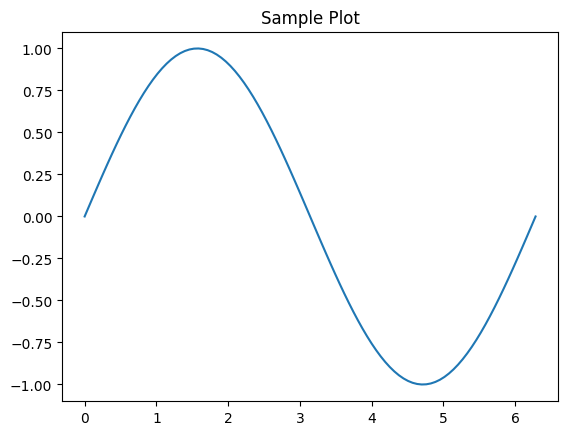

In [8]:
# Generate and save a plot as an artifact
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

plt.plot(x, y)
plt.title("Sample Plot")
plt.savefig("plot.png")

# Log the plot artifact
client.log_artifact(run.info.run_id, "plot.png")
print(f"Logged artifact for run ID: {run.info.run_id}")

- **`log_artifact(run_id, local_path, artifact_path=None)`**: Logs an artifact (a file or directory) for the specified run.
  - `run_id`: The id of the run where the artifact should be logged.
  - `local_path`: The path to the local file or directory to log as an artifact.
  - `artifact_path` (Optional): A destination within the artifact store where the artifact should be logged. If not specified, the artifact is logged at the root of the artifact directory for the run.
 
#### Logging batches of metrics, parameters, and tags
If we need to log multiple metrics, parameters, or tags at once, we can use the `log_batch()` method. This is more efficient when we have many items to log in a single step.

In [9]:
# Log a batch of metrics, parameters, and tags
metrics = [Metric(key="f1", value=0.85, timestamp=123, step=1),
           Metric(key="precision", value=0.75, timestamp=123, step=1)]
params = [Param(key="param3", value="7"),
          Param(key="param4", value="value2")]
tags = [RunTag(key="framework", value="sklearn")]

client.log_batch(run.info.run_id, metrics=metrics, params=params, tags=tags)
print(f"Logged batch for run ID: {run.info.run_id}")

Logged batch for run ID: dc9384d036974781a9dadbbe6d31558a


- **`log_batch(run_id, metrics=(), params=(), tags=(), synchronous=None)`**: Logs a batch of metrics, parameters, and tags for the specified run.
  - `run_id`: The id of the run where the batch should be logged.
  - `metrics`: A sequence of `Metric` objects to log.
  - `params`: A sequence of `Param` objects to log.
  - `tags`: A sequence of `RunTag` objects to log.
  - `synchronous`: If `True`, wait for the logging to complete before returning.

#### Logging dictionaries as artifacts
If we want to log an entire dictionary as an artifact (e.g., model configuration or results), we can use the `log_dict()` function. This stores the dictionary as a JSON file in the artifact store.

In [10]:
# Log a dictionary as an artifact
config_dict = {"param1": 5, "param2": "value", "accuracy": 0.85}
client.log_dict(run.info.run_id, config_dict, "config.json")
print(f"Logged dictionary artifact for run ID: {run.info.run_id}")

Logged dictionary artifact for run ID: dc9384d036974781a9dadbbe6d31558a


- **`log_dict(run_id, dictionary, artifact_file)`**: Logs a dictionary as a JSON artifact.
  - `run_id`: The id of the run where the dictionary should be logged.
  - `dictionary`: The dictionary to log.
  - `artifact_file`: The name of the file to save the dictionary as (e.g., `"config.json"`).

#### Logging text as an artifact
When we need to log plain text (e.g., logs, descriptions, or model summaries) as an artifact, we can use the `log_text()` function. This function stores the text in a file within the artifact store.

In [11]:
# Log a text file as an artifact
log_text = "Model trained with parameters: param1=5, param2=value"
client.log_text(run.info.run_id, log_text, "train_log.txt")
print(f"Logged text artifact for run ID: {run.info.run_id}")

Logged text artifact for run ID: dc9384d036974781a9dadbbe6d31558a


- **`log_text(run_id, text, artifact_file)`**: Logs a string of text as an artifact.
  - `run_id`: The id of the run where the text should be logged.
  - `text`: The text content to log.
  - `artifact_file`: The name of the file to save the text as (e.g., `"train_log.txt"`).

#### Downloading artifacts
The `download_artifacts()` function allows us to download artifacts (files or directories) associated with a specific run. This is useful when we need to retrieve output files, such as model files, plots, or logs, from a remote MLflow server.

In [12]:
# Download artifacts from a run
local_dir = client.download_artifacts(run.info.run_id, path="", dst_path="C:/Users/israe")
print(f"Artifacts downloaded to: {local_dir}")

Artifacts downloaded to: C:\Users\israe\


- **`download_artifacts(run_id, path, dst_path=None)`**: Downloads artifacts from a specified run to a local directory.
  - `run_id`: The id of the run from which to download artifacts.
  - `path`: The relative path of the artifact within the run’s artifact directory. If empty, will download all the artifact directory.
  - `dst_path` (Optional): The local directory to download the artifact to. If not specified, a temporary directory will be created.
  - **Returns**: The local path to the downloaded artifact.

### Terminating a run
In MLflow, it is important to explicitly terminate a run to ensure that its status is correctly updated. By default, if a run is not terminated, its status will remain as 'running'. Properly terminating a run helps in tracking the completion of experiments and ensures that all logs and artifacts are finalized. To terminate a run, we can use the `set_terminated` method provided by the `MlflowClient`. This method updates the status of a run to a specified value, such as 'FINISHED', 'FAILED', 'KILLED', 'RUNNING', or 'SCHEDULED'.

In [13]:
# Terminate a run
client.set_terminated(run.info.run_id, status="FINISHED")
print(f"Run with ID: {run.info.run_id} has been terminated with status: FINISHED")

Run with ID: dc9384d036974781a9dadbbe6d31558a has been terminated with status: FINISHED


- **`set_terminated(run_id, status)`**: This function is used to set the final status of a run.
  - `run_id`: The id of the run we want to terminate.
  - `status`: The final status of the run, which can be one of the following:
    - `"FINISHED"`: (Default) The run completed successfully.
    - `"FAILED"`: The run failed.
    - `"KILLED"`: The run was manually stopped.
    - `"RUNNING"`: The run is still running.
    - `"SCHEDULED"`: The run is scheduled but not yet started.

Another way to terminate a run is by using the `update_run` method. This method allows us to update various properties of a run, including its status. This method is useful if we need to update multiple attributes of a run at once.

### Tracking with tags and descriptions
Tags and descriptions can be used to add additional metadata to runs, making it easier to organize and search for them.

#### Adding tags to a run
We can add tags to a run using the `set_tag` method of the `MlflowClient`. This method allows us to specify tags even after the run has been created.

In [14]:
# Add tags to a run
client.set_tag(run.info.run_id, "tag1", "value1")
client.set_tag(run.info.run_id, "model_version", "v1.0")
print(f"Tags have been added to run ID: {run.info.run_id}")

Tags have been added to run ID: dc9384d036974781a9dadbbe6d31558a


- **`set_tag(run_id, key, value)`**: Adds or updates a tag for a specific run.
  - `run_id`: The unique identifier of the run to which we want to add or update a tag.
  - `key`: The tag's key (e.g., `"tag1"` or `"model_version"`).
  - `value`: The value associated with the tag (e.g., `"value1"` or `"v1.0"`).

#### Adding a description to a run
Descriptions can be added to a run are added as a special tag with the key `mlflow.note.content`.

In [15]:
# Set a description for a run
description = "This run uses a random forest model with 100 trees."
client.set_tag(run.info.run_id, "mlflow.note.content", description)
print(f"Description has been set for run ID: {run.info.run_id}")

Description has been set for run ID: dc9384d036974781a9dadbbe6d31558a


- **`set_tag(run_id, key, value)`**: This method is also used to add descriptions. By using the key `mlflow.note.content`, we can store a descriptive note about the run.
  - `run_id`: The unique identifier of the run to which you want to add the description.
  - `key`: Set to `"mlflow.note.content"` for descriptions.
  - `value`: The description text.

#### Deleting a run tag
We can delete a specific tag from a run using the `delete_tag` method provided by the `MlflowClient`. This operation is irreversible, meaning once a tag is deleted, it cannot be recovered.

In [16]:
# Delete a tag from a run
client.delete_tag(run.info.run_id, "tag1")
print(f"Tag 'tag1' has been deleted from run ID: {run.info.run_id}")

Tag 'tag1' has been deleted from run ID: dc9384d036974781a9dadbbe6d31558a


- **`delete_tag(run_id, key)`**: Deletes a tag from a specified run.
  - `run_id`: The id of the run from which we want to delete the tag.
  - `key`: The key of the tag we want to delete.

### Updating, deleting, and restoring runs
MLflow provides flexible options for managing runs, including updating their status or name, deleting them, and restoring previously deleted runs.

#### Updating run
We can update the status or name of an existing run using the `update_run()` method. This is particularly useful if we need to change a run’s status to something other than `FINISHED` or to rename a run for better clarity.

In [17]:
# Update a run's status and name
client.update_run(run_id=run.info.run_id, status="FAILED", name="Updated_Run_Name")
print(f"Run ID: {run.info.run_id} has been updated with status 'FAILED' and new name 'Updated_Run_Name'")

Run ID: dc9384d036974781a9dadbbe6d31558a has been updated with status 'FAILED' and new name 'Updated_Run_Name'


- **`update_run(run_id, status=None, name=None)`**: Updates the status or name of a run.
  - `run_id`: The unique identifier of the run to update.
  - `status`: The new status for the run, which can be one of `"FINISHED"`, `"FAILED"`, `"KILLED"`, `"RUNNING"`, or `"SCHEDULED"`. If not specified, the status remains unchanged.
  - `name`: The new name for the run. If not specified, the name remains unchanged.

#### Deleting a run
To remove a run from the active state, use the `delete_run()` method. This action marks the run as deleted.

In [18]:
# Delete a run by ID
client.delete_run(run.info.run_id)
print(f"Run ID: {run.info.run_id} has been deleted.")

Run ID: dc9384d036974781a9dadbbe6d31558a has been deleted.


- **`delete_run(run_id)`**: Marks a run as deleted. Note that this is a soft delete, meaning the run is marked as deleted but its data is not removed.
  - `run_id`: The unique identifier of the run to delete.

#### Restoring a deleted run
If a run has been accidentally deleted or needs to be reactivated, we can restore it using the `restore_run()` method. This moves the run back to an active state.

In [19]:
# Restore a deleted run by ID
client.restore_run(run_id=run.info.run_id)
print(f"Run ID: {run.info.run_id} has been restored.")

Run ID: dc9384d036974781a9dadbbe6d31558a has been restored.


- **`restore_run(run_id)`**: Restores a previously deleted run to an active state.
  - `run_id`: The unique identifier of the run to restore.

### Searching runs
MLflow provides the `search_runs()` function to query and filter runs within an experiment. This is useful when we need to find specific runs based on certain criteria, such as filtering by metrics, parameters, or tags. 

#### Listing all runs
To list all runs within a specific experiment, we can use `search_runs()` without any filters. This will return all runs for the specified experiment ID(s).

In [20]:
# List all runs for a given experiment
runs = client.search_runs(experiment_ids=[experiment_id])
for run in runs:
    print(f"Run ID: {run.info.run_id}, Status: {run.info.status}")

Run ID: dc9384d036974781a9dadbbe6d31558a, Status: FAILED


- **`search_runs(experiment_ids, filter_string='', run_view_type=1, max_results=1000, order_by=None, page_token=None)`**: Searches for runs in the specified experiment(s).
  - `experiment_ids`: A list of experiment IDs to search within.
  - `filter_string` (Optional): A query string to filter results.
  - `run_view_type` (Optional): Specifies the type of runs to return. Defaults to `1` (active runs).
  - `max_results` (Optional): The maximum number of runs to return. Defaults to `1000`.
  - `order_by` (Optional): A list of fields to order the results by (e.g., `["metrics.accuracy DESC"]`).
  - `page_token` (Optional): For paginated results, the token to retrieve the next page.


#### Filtering runs
We can filter runs based on specific criteria using the `filter_string` parameter. For example, we might want to find all runs where the accuracy metric is greater than a certain threshold.

In [21]:
# Search runs with a filter
runs = client.search_runs(
    experiment_ids=experiment_id, 
    filter_string="metrics.accuracy > 0.8"
)

for run in runs:
    print(f"Run ID: {run.info.run_id}, Accuracy: {run.data.metrics['accuracy']}")

Run ID: dc9384d036974781a9dadbbe6d31558a, Accuracy: 0.85


- **`filter_string`**: A filter expression to narrow down the search. We can filter by metrics, parameters, tags, and more.
  - Example: `"metrics.accuracy > 0.8 AND params.model_type = 'random_forest'"`.

#### Ordering runs
To sort the search results, we can use the `order_by` parameter. This allows us to sort runs based on metrics, parameters, or other attributes.

In [22]:
# Search and order runs by accuracy in descending order
runs = client.search_runs(
    experiment_ids=experiment_id, 
    order_by=["metrics.accuracy DESC"]
)

for run in runs:
    print(f"Run ID: {run.info.run_id}, Accuracy: {run.data.metrics['accuracy']}")

Run ID: dc9384d036974781a9dadbbe6d31558a, Accuracy: 0.85


- **`order_by`**: A list of fields to order the results by. We can specify the field name and order (e.g., `"ASC"` for ascending or `"DESC"` for descending).
  - Example: `["metrics.accuracy DESC"]` to order by accuracy in descending order.

#### Filtering by run tags
We can also filter runs based on specific tags. This is useful if we have added custom tags to our runs and want to retrieve runs that match certain tag values.

In [23]:
# Search runs with a specific tag
filter_string = "tags.model_version = 'v1.0'"
runs = client.search_runs(experiment_ids=experiment_id, filter_string=filter_string)

for run in runs:
    print(f"Run ID: {run.info.run_id}, Model Version: {run.data.tags['model_version']}")

Run ID: dc9384d036974781a9dadbbe6d31558a, Model Version: v1.0


- **Filtering by Tags**: Use the `tags.<tag_name>` syntax in the `filter_string` to filter runs by specific tags.
  - Example: `"tags.model_version = 'v1.0'"` to find runs with the tag `model_version` set to `'v1.0'`.

### Retrieving metric history
The `get_metric_history()` function allows us to retrieve the history of a particular metric for a run. This is particularly useful for analyzing how a deep learning model’s performance metric, such as accuracy or loss, changes over time during training.

In [24]:
# Get the history of a metric from a run
metric_history = client.get_metric_history(run.info.run_id, "accuracy")
for metric in metric_history:
    print(f"Step: {metric.step}, Value: {metric.value}")

Step: 0, Value: 0.85


- **`get_metric_history(run_id, key)`**: Retrieves the history of a specific metric logged during a run.
  - `run_id`: The id of the run from which to retrieve the metric history.
  - `key`: The name of the metric to retrieve (e.g., `"accuracy"`).
  - **Returns**: A list of `Metric` objects, each representing a logged value of the metric at a specific step.